## Generate an exact solution with a very fine grid and a very small time steps 

In [99]:
########### ERROR ANALYSIS ###########

import typing
from typing import Callable, Tuple, List, Union
from vedo.dolfin import plot, Latex, clear, histogram
from fenics import *
import numpy as np
import pickle 
import time
import matplotlib.pyplot as plt
from solver_alix import solver, solver_ada,solver_para,solver_loop_ada,solver_loop



### Choose a final time 

We do not want to loose too much time running the simulation too long after the temperature has plateau, therefore we plot the L2 norm at each time of the temperature. We decide that the temperature plateau at 2.5 seconds and therefore limits our analysis to that. 

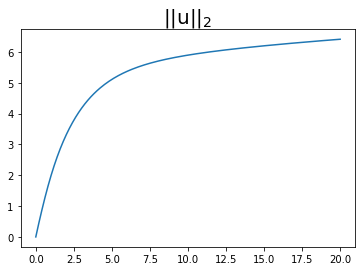

In [101]:

### Choose a final time 
"""
We do not want to loose too much time running the simulation too long after the temperature has plateau,
therefore we plot the L2 norm at each time of the temperature. We decide that the temperature plateau at 
2.5 seconds and therefore limits our analysis to that. 
"""

## Time 
## check whether solver does what we want : 
w = Expression(('2*x[1]*(1-x[0]*x[0])', '-2*x[0]*(1-x[1]*x[1])'), degree=3)
alpha0 = 1 # Initial value of alpha
iterations = 100 # Lenght of the MCMC chain
tau =2 #Value of tau
epsilon = 1/200 #
dt = 1/200 #number of time steps taken
T =  20 #final time 
nx = 30 #size of the grid
ny = 30 #size of the grid
dt = 0.1
num_steps = int(1/dt)
dt_list = []
dt_list = dt*np.array([x for x in range(0,int(num_steps*T)+1)])
u_lists1, unorm_lists1, t_lists1 = solver(nx,ny,tau,alpha0, epsilon, dt, T,w)
plt.plot(np.linspace(0,T,len(unorm_lists1)),unorm_lists1)
plt.title("$\|\| u\|\|_2$", fontsize=20)
plt.show()

## Compute the error by looking at the difference at time T = 0.5, T = 1 and T = 2

We use the boundary condition to mimic the speed of the process and use a time steps that is adapted to the problem. Very small at the begining fast after. 

[0.1   0.185 0.265 0.335 0.395 0.455 0.505 0.555 0.595 0.635 0.67  0.7
 0.73  0.755 0.78  0.8   0.82  0.835 0.85  0.865]
[0.1  0.19 0.26 0.33 0.4  0.45 0.51 0.55 0.6  0.63 0.67 0.7  0.73 0.76
 0.78 0.8  0.82 0.84 0.85 0.87]
common time between fine and this


Text(0.5, 1.0, 'Adaptive time steps')

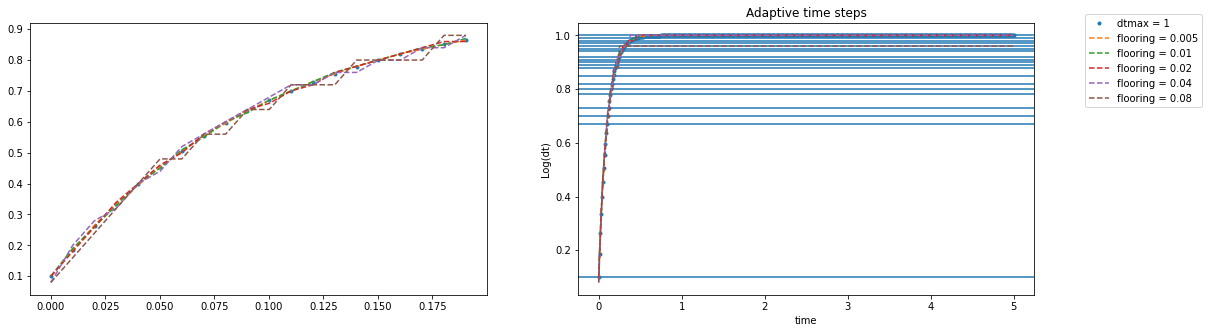

In [192]:
## Plot both in bigger view and the plots 
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 5)) #create the figure 


## getting an adaptive time steps
tau = 1/10 
dt = 0.1
t = np.linspace(0,T,int(T*100))
nsee = 20 #parameter to see better whats going on

dt_max = 1 # the maximum time steps we are allowed to take 
floor_list = [0.005,0.01,0.02,0.04,0.08,0.16] # the list of minimal flooring 
time_der = ((1-np.exp(-t/tau)) *0.9+0.1)*dt_max
ax1.plot(t[0:nsee],(time_der[0:nsee]),".",label = "dtmax = "+str(dt_max))
ax2.plot(t,time_der,".",label = "dtmax = "+str(dt_max))

## 0
floori = floor_list[0]
time_der_floor_current0 = np.round(time_der/floori)*floori
ax1.plot(t[0:nsee],(time_der_floor_current0[0:nsee]),"--",label = "flooring = "+str(floori))
ax2.plot(t,(time_der_floor_current0),"--",label = "flooring = "+str(floori))
print(time_der_floor_current0[0:nsee])

## 1
floori = floor_list[1]
time_der_floor_current1 = np.round(time_der/floori)*floori
ax1.plot(t[0:nsee],(time_der_floor_current1[0:nsee]),"--",label = "flooring = "+str(floori))
ax2.plot(t,(time_der_floor_current1),"--",label = "flooring = "+str(floori))
print(time_der_floor_current1[0:nsee])
print("common time between fine and this")
inter = (np.intersect1d(time_der_floor_current1,time_der_floor_current0))
for interi in inter: 

    plt.axhline(interi)
## 2
floori = floor_list[2]
time_der_floor_current2 = np.round(time_der/floori)*floori
ax1.plot(t[0:nsee],(time_der_floor_current2[0:nsee]),"--",label = "flooring = "+str(floori))
ax2.plot(t,(time_der_floor_current2),"--",label = "flooring = "+str(floori))

## 3
floori = floor_list[3]
time_der_floor_current3 = np.round(time_der/floori)*floori
ax1.plot(t[0:nsee],(time_der_floor_current3[0:nsee]),"--",label = "flooring = "+str(floori))
ax2.plot(t,(time_der_floor_current3),"--",label = "flooring = "+str(floori))

## 4
floori = floor_list[4]
time_der_floor_current4 = np.round(time_der/floori)*floori
ax1.plot(t[0:nsee],(time_der_floor_current4[0:nsee]),"--",label = "flooring = "+str(floori))
ax2.plot(t,(time_der_floor_current4),"--",label = "flooring = "+str(floori))



plt.plot()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("time")
plt.ylabel("Log(dt)")
plt.title("Adaptive time steps")



We want to use a step function instead of a continuous changing time steps in order to be able to evaluate the solution at times that are similar ! 


In [133]:
## getting an adaptive time steps
tau = 1/10 
dt = 0.1
dt_max = 0.1
time_list = []
t=0
for i in range(10):
    t_list = ((1-np.exp(-t/tau)) *0.9+0.1)*dt_max
    dt_floor = np.round(t_list/0.01)*0.01
    t += dt
    time_list.append(t)
print(time_list,".")
# t = np.linspace(0,0.5,int(T*100))

# ##
# nsee = -1
# dt_max = 1
# t_list = ((1-np.exp(-t/tau)) *0.9+0.1)*dt_max
# time_der1 = np.round(t_list/0.01)*0.01
# plt.plot(time_der1[0:nsee],"--",label = "nearest = "+str(0.01))
# time_der2 = np.round(t_list/0.02)*0.02
# plt.plot(time_der2[0:nsee],"--",label = "nearest = "+str(0.02))
# time_der3 = np.round(t_list/0.04)*0.04
# plt.plot(time_der3[0:nsee],"--",label = "nearest = "+str(0.04))

# intersect = np.intersect1d(np.intersect1d(time_der2,time_der3), time_der1)
# plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.xlabel("time")
# plt.ylabel("(dt)")
# plt.title("Adaptive time steps")
# for i in intersect:
#     plt.axhline(i)
#     print(i)

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7, 0.7999999999999999, 0.8999999999999999, 0.9999999999999999] .


### Test the adaptive time steps 

Below we show that the adaptive time steps implementation returns the appropriate values of u and is stable . 

In [120]:
########### ERROR ANALYSIS ###########

import matplotlib.pyplot as plt
import typing
from typing import Callable, Tuple, List, Union
from vedo.dolfin import plot, Latex, clear, histogram
from fenics import *
import numpy as np
import pickle 
import time
from solver_alix import solver_ada ,solver, solver_para, solver_loop, solver_loop_ada
######### ADATPIVE STEP SIZE #########

w = Expression(('2*x[1]*(1-x[0]*x[0])', '-2*x[0]*(1-x[1]*x[1])'), degree=3)
alpha0 = 1 # Initial value of alpha
iterations = 100 # Lenght of the MCMC chain
tau =1/20 #Value of tau
epsilon = 1/200 #
T =  5 #final time 
nx = 30 #size of the grid
ny = 30 #size of the grid

## I - RESOLVE WITH EXACT SOLUTION LARGE GRID (COARSE)
dt = 0.5 # dt = 1/2
u_lists2, unorm_lists2, t_lists2 = solver(nx,ny,tau,alpha0, epsilon, dt, T,w)
 
## II - RESOLVE WITH EXACT SOLUTION FINE GRID 
dt = 0.1 # dt = 1/2
u_lists2, unorm_lists2, t_lists2 = solver(nx,ny,tau,alpha0, epsilon, dt, T,w)
 
## III - RESOLVE WITH ADAPTIVE STEPSIZE 
dt = 0.1 #number of time steps taken

u_listsa, unorm_listsa, t_listsa = solver_ada(nx,ny,tau,alpha0, epsilon, dt, T,w)



Number of steps for the adaptive step size
12
Number of steps for the fine step size
51
Number of steps for the coarse step size
10


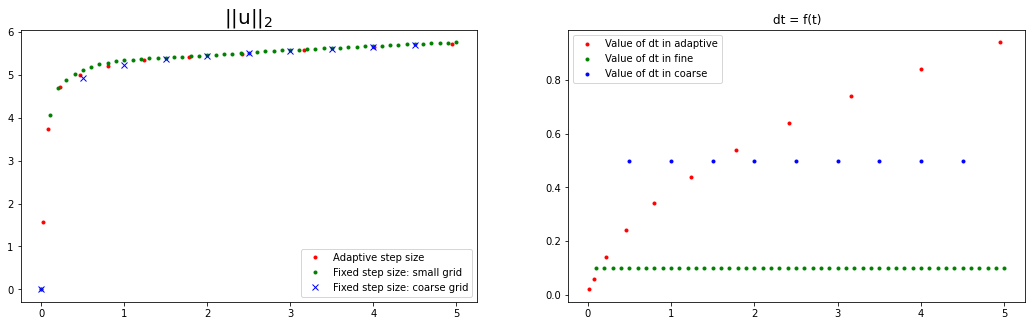

In [121]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 5)) #create the figure 

ax1.plot(t_listsa,unorm_listsa,".",color="red",label = "Adaptive step size")
ax1.plot(t_lists1,unorm_lists1,".",color="green",label = "Fixed step size: small grid")
ax1.plot(t_lists2,unorm_lists2,"x",color="blue",label = "Fixed step size: coarse grid")
ax1.set_title("$\|\| u\|\|_2$", fontsize=20)
ax1.legend()

dt_lista = t_listsa[1::]-t_listsa[0:len(t_listsa)-1]
dt_list1 = t_lists1[1::]-t_lists1[0:len(t_lists1)-1]
dt_list2 = t_lists2[1::]-t_lists2[0:len(t_lists2)-1]
ax2.plot(t_listsa[1::],dt_lista,".",color = "red",label = "Value of dt in adaptive")
ax2.plot(t_lists1[1::],dt_list1,".",color = "green",label = "Value of dt in fine")
ax2.plot(t_lists2[1::],dt_list2,".",color = "blue", label = "Value of dt in coarse")
ax2.set_title("dt = f(t)")
ax2.legend()

print("Number of steps for the adaptive step size")
print(len(t_listsa))
print("Number of steps for the fine step size")
print(len(t_lists1))
print("Number of steps for the coarse step size")
print(len(t_lists2))



### Show that implementing the adaptive time steps was worth the effort 
To show this, we will compute an exact solution with a very fine time steps, as dt = 0.0001. Then we use the adaptive time steps and the non adaptive time steps with the same number of loop ran (adjusting dt of the adaptive time steps consequently) and see whether we gain some accuracy. 

In [31]:
## Set up parameter
w = Expression(('2*x[1]*(1-x[0]*x[0])', '-2*x[0]*(1-x[1]*x[1])'), degree=3)
alpha0 = 1 # Initial value of alpha
iterations = 100 # Lenght of the MCMC chain
tau =1/20 #Value of tau
epsilon = 1/200 #
dt = 0.0001 #number of time steps taken
T =  5 #final time 
nx = 30 #size of the grid
ny = 30 #size of the grid

u_listsE, unorm_listsE, t_listsE = solver(nx,ny,tau,alpha0, epsilon, dt, T,w)


Calling FFC just-in-time (JIT) compiler, this may take some time.


#### An exact solution that is very expensive to compute (1 hour)

In [10]:
## Save the sol that took an hour to run 
# name_file = "Alixcode/err_analysis_unormE.csv"
# with open(name_file, 'wb') as f:
#     pickle.dump(unorm_listsE, f)
# name_file = "Alixcode/err_analysis_unormE.csv"
# with open(name_file, 'rb') as f:
#     unorm_listsE = pickle.load(f)

# # name_file = "Alixcode/err_analysis_ulistE.csv"
# # with open(name_file, 'wb') as f:
# #     pickle.dump(u_listsE, f)
# name_file = "Alixcode/err_analysis_ulistE.csv"
# with open(name_file, 'rb') as f:
#     u_listsE = pickle.load(f)

# # name_file = "Alixcode/err_analysis_tlistE.csv"
# # with open(name_file, 'wb') as f:
# #     pickle.dump(t_listsE, f)
# name_file = "Alixcode/err_analysis_tlistE.csv"
# with open(name_file, 'rb') as f:
#     t_listsE = pickle.load(f)

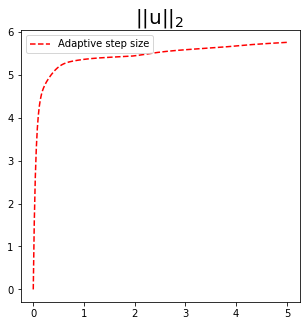

In [26]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5, 5)) #create the figure 
ax1.plot(t_listsE,unorm_listsE,"--",color="red",label = "Adaptive step size")
ax1.set_title("$\|\| u\|\|_2$", fontsize=20)
ax1.legend()


### Now compute for the adaptive step size solutions at coarser grid than the exact solution and compare adaptive step size to constant step size

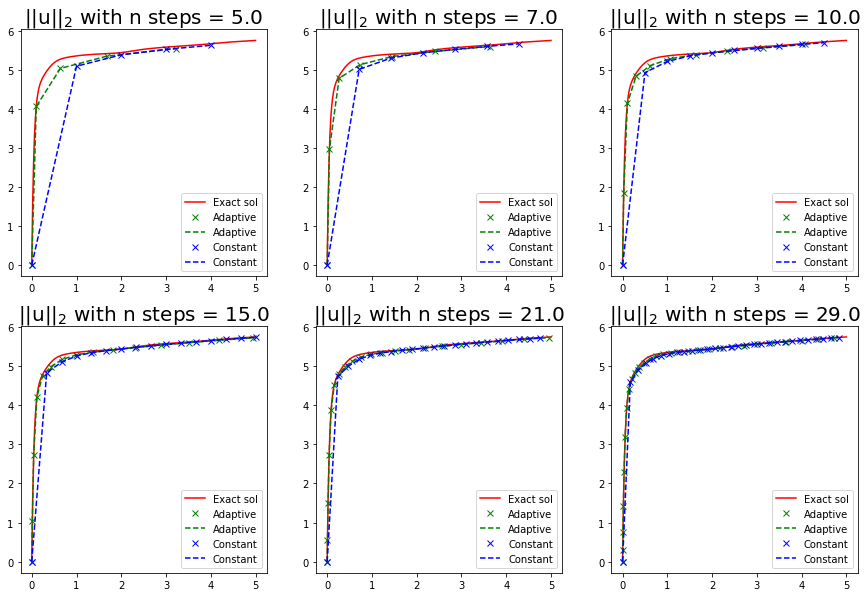

In [27]:
fig, (ax) = plt.subplots(2, 3, figsize=(15, 10)) #create the figure 
npower = [[1,2,3],[4,5,6]]
dt_list = np.power(1/2,npower)
error_adaptive = []
num_steps_list = []

## Set up the parameters
for i in range(2):
    for j in range(3):
        dti = dt_list[i,j]
        u_listsa, unorm_listsa, t_listsa = solver_ada(nx,ny,tau,alpha0, epsilon, dti, T,w)
        num_steps = len(t_listsa)/5
        u_list, unorm_list, t_list = solver(nx,ny,tau,alpha0, epsilon, 1/num_steps, T,w)
        ax[i,j].plot(t_listsE,unorm_listsE,color="red",label = "Exact sol")
        ax[i,j].plot(t_listsa,unorm_listsa,"x",color="green",label = "Adaptive")
        ax[i,j].plot(t_listsa,unorm_listsa,"--",color="green",label = "Adaptive")
        ax[i,j].plot(t_list,unorm_list,"x",color="blue",label = "Constant")
        ax[i,j].plot(t_list,unorm_list,"--",color="blue",label = "Constant")
        ax[i,j].legend()
        ax[i,j].set_title("$\|\| u\|\|_2$ with n steps = "+str(num_steps*T), fontsize=20)
        ax[i,j].legend()

# plt.plot(error_adaptive)


NameError: name 't_listsE' is not defined

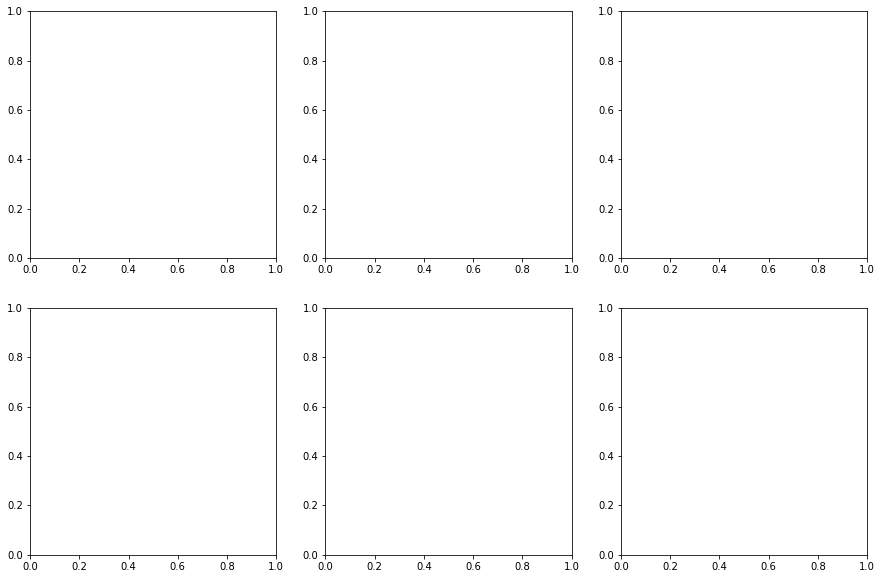

In [30]:
fig, (ax) = plt.subplots(2, 3, figsize=(15, 10)) #create the figure 
npower = [[1,2,3],[4,5,6]]
dt_list = np.power(1/2,npower)
error_adaptive = []
num_steps_list = []

## Set up the parameters
#mesh, V, u, v, f = solver_para(nx,ny)
for i in range(2):
    for j in range(3):
        dti = dt_list[i,j]
        u_listsa, unorm_listsa, t_listsa = solver_ada(nx,ny,tau,alpha0, epsilon, dti, T,w)
        num_steps = len(t_listsa)/5
        u_list, unorm_list, t_list = solver(nx,ny,tau,alpha0, epsilon, dt, T,w)
        ax[i,j].plot(t_listsE,unorm_listsE,color="red",label = "Exact sol")
        ax[i,j].plot(t_listsa,unorm_listsa,"x",color="green",label = "Adaptive")
        ax[i,j].plot(t_listsa,unorm_listsa,"--",color="green",label = "Adaptive")
        ax[i,j].plot(t_list,unorm_list,"x",color="blue",label = "Constant")
        ax[i,j].plot(t_list,unorm_list,"--",color="blue",label = "Constant")
        ax[i,j].legend()
        ax[i,j].set_title("$\|\| u\|\|_2$ with n steps = "+str(num_steps*T), fontsize=20)
        ax[i,j].legend()

# plt.plot(error_adaptive)


#### Find values of T at which we can compare the steps size with the exact solution. Assuming a very fine time grid for observation, we have: 
To do so, we will take the larger grid, find the value the closest to T = Tfixed (an arbitrary value of T at which we look the error) and then look in the very fine grid the corresponding closest value. 

In [31]:
## Write a function to find the index of nearest element
def find_nearest(a, a0):
    "Element in nd array `a` closest to the scalar value `a0`"
    idx = np.abs(a - a0).argmin()
    return idx

# Power of 
npower = np.array([[1,2,3,4],[5,6,7,8]])
dt_list = np.power(1/2,npower)

# Fixed time at which we evaluate the error
error_adaptiveL = []
error_constantL = []

# Find value of unorm in exact sol the closet to T of interest 
Ti = 5
idx = find_nearest(t_listsE,Ti) #find the index of the closest result of u to T=2
norm_listsETi = unorm_listsE[::idx] #find the value of unorm at T = Ti 
int_normE = np.trapz(norm_listsETi) #find the integral until T = 5 

# run through the different values of time steps 
for i in range(2):
    for j in range(3):
        # get the time steps
        dti = dt_list[i,j]
        print(dti)
        ## compute adaptive step size
        u_listsa, unorm_listsa, t_listsa = solver_ada(nx,ny,tau,alpha0, epsilon, dti, T,w) #run solver
        idx = find_nearest(t_listsa,2) #find the index of the closest result of u to T=2
        int_normsa =np.trapz(unorm_listsa[::idx])
        error_adapt = np.abs(int_normsa -int_normE) # find the error between the value of u with very fine grid and approximate u at this time
        error_adaptiveL.append(error_adapt)

        ## compute time steps 
        num_steps = len(t_listsa)/5 #number of steps
        u_list, unorm_list, t_list = solver(nx,ny,tau,alpha0, epsilon, 1/num_steps, T,w)
        idx = find_nearest(t_list,2) #find the index of the closest result of u to T=2
        int_norm = np.trapz(unorm_list[::idx])
        error_constant = np.abs(int_norm -int_normE) # find the error between the value of u with very fine grid and approximate u at this time
        error_constantL.append(error_constant)


0.5
0.25
0.125
0.03125
0.015625
0.0078125
Calling FFC just-in-time (JIT) compiler, this may take some time.


Text(0.5, 1.0, 'Trapeozidale integrals of U norm')

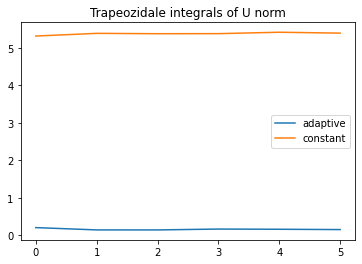

In [32]:
plt.plot(error_adaptiveL,label = "adaptive")
plt.plot(error_constantL,label = "constant")
plt.legend()
plt.title("Trapeozidale integrals of U norm")

## Adaptive step size 
Clearly the adaptive step size is performing better on simulating the solution. 
Now the question is that if we can't compare exactly the time at which we compare our solutions, how are we supposed to compute a likelihood. One way would be to compare the observed data with noise 


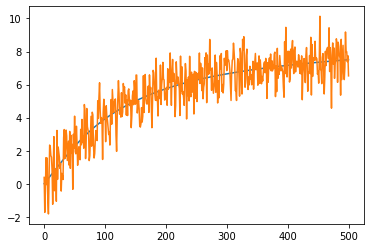

In [35]:
alpha0 = 1 # Initial value of alpha - start at something else
iterations = 100  # Lenght of the MCMC chain
tau =1 #Value of tau
epsilon = 1/20 #
num_steps = 100 #number of time steps taken
T = 5.0 #final time 
nx = 30 #size of the grid
ny = 30 #size of the grid
sigma_q = 0.5 #variance of the guess proposal
sigma_p = 1 #variance of the prior
mu_p = 0 #mean of the proposal 
sigma_l = 0.2 #variance of the likelihood
w = Expression(('2*x[1]*(1-x[0]*x[0])', '-2*x[0]*(1-x[1]*x[1])'), degree=3) # wind expression

## Generate the observed data
noise_star = 1 # noise added to the data
alpha_star = 0
nx_star=30
ny_star=30 

mesh, V, u, v, f = solver_para(nx_star,ny_star)
u_list, unorm_list, t_list=solver_loop(alpha0,mesh,V,u,v,f,tau, epsilon, num_steps, T,w)
ynorm_star = unorm_list + np.random.normal(np.zeros(np.shape(unorm_list)), noise_star)

# Compute the integral of y over 1:T 

plt.plot(unorm_list)
plt.plot(ynorm_star)
plt.show()

#### Check that the adaptive scheme methods yields the same results when splitting the code than when you don't split the code. 



In [2]:
####### ADATPIVE STEP SIZE #########

w = Expression(('2*x[1]*(1-x[0]*x[0])', '-2*x[0]*(1-x[1]*x[1])'), degree=3)
alpha0 = 1 # Initial value of alpha
iterations = 100 # Lenght of the MCMC chain
tau =1/20 #Value of tau
epsilon = 1/200 #
T =  5 #final time 
nx = 30 #size of the grid
ny = 30 #size of the grid
dt = 0.1 #number of time steps taken

## Split adaptive method : 
mesh, V, u, v, f = solver_para(nx,ny)
u_list, unorm_list, t_list = solver_loop_ada(alpha0,mesh,V,u,v,f,tau, epsilon, dt, T,w)

## Non split method 
# u_listsa, unorm_listsa, t_listsa = solver_ada(nx,ny,tau,alpha0, epsilon, dt, T,w)

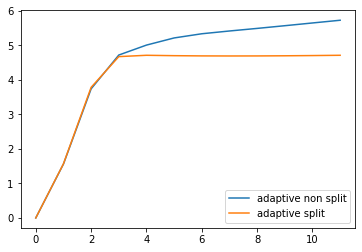

In [10]:
plt.plot(unorm_listsa, label = "adaptive non split")
plt.plot(unorm_list,label = "adaptive split")
plt.legend()

### Floor function 


[0.08 0.12 0.12 0.12 0.12 0.16 0.16 0.16 0.16 0.16 0.2  0.2  0.2  0.2
 0.2  0.24 0.24 0.24 0.24 0.24 0.28 0.28 0.28 0.28 0.28 0.28 0.32 0.32
 0.32 0.32 0.32 0.36 0.36 0.36 0.36 0.36 0.36 0.36 0.4  0.4  0.4  0.4
 0.4  0.4  0.44 0.44 0.44 0.44 0.44 0.44 0.44 0.48 0.48 0.48 0.48 0.48
 0.48 0.48 0.48 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.52 0.56 0.56 0.56
 0.56 0.56 0.56 0.56 0.56 0.56 0.56 0.6  0.6  0.6  0.6  0.6  0.6  0.6
 0.6  0.6  0.6  0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64 0.64
 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.68 0.72 0.72
 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.76 0.76
 0.76 0.76 0.76 0.76 0.76 0.76 0.76 0.76 0.76 0.76 0.76 0.76 0.76 0.76
 0.76 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.8
 0.8  0.8  0.8  0.8  0.8  0.8  0.8  0.84 0.84 0.84 0.84 0.84 0.84 0.84
 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84 0.84
 0.84 0.84 0.84 0.84 0.88 0.88 0.88 0.88 0.88 0.88 0.88 0.88 0.88 0.88
 0.88 0.88

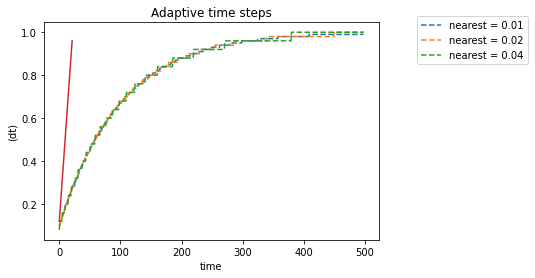

In [74]:
## getting an adaptive time steps
tau = 1/10 
dt = 0.1
t = np.linspace(0,0.5,int(T*100))
x = 1 
npower = np.array(range(1,5))
dt_list = 1/2**(npower)

nsee = -1
dt_max = 1
t_list = ((1-np.exp(-t/tau)) *0.9+0.1)*dt_max
time_der1 = np.round(t_list/0.01)*0.01
plt.plot(time_der1[0:nsee],"--",label = "nearest = "+str(0.01))
time_der2 = np.round(t_list/0.02)*0.02
plt.plot(time_der2[0:nsee],"--",label = "nearest = "+str(0.02))
time_der3 = np.round(t_list/0.04)*0.04
plt.plot(time_der3[0:nsee],"--",label = "nearest = "+str(0.04))

intersect = np.intersect1d(np.intersect1d(time_der2,time_der3), time_der1)
plt.plot(intersect)
plt.plot()
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlabel("time")
plt.ylabel("(dt)")
plt.title("Adaptive time steps")
print(time_der3)

In [73]:
print(np.intersect1d(time_der3, time_der2))

print(np.intersect1d(time_der1, time_der2))
intersect = np.intersect1d(np.intersect1d(time_der2,time_der3), time_der1)

[0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56 0.6  0.64
 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96 1.  ]
[0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26 0.28 0.3  0.32 0.34 0.36
 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64
 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82 0.84 0.86 0.88 0.9  0.92
 0.94 0.96 0.98]
[0.12 0.16 0.2  0.24 0.28 0.32 0.36 0.4  0.44 0.48 0.52 0.56 0.6  0.64
 0.68 0.72 0.76 0.8  0.84 0.88 0.92 0.96]


In [18]:
npower = np.array(range(1,5))
dt_list = 1/2**(npower)
dt_list

array([0.5   , 0.25  , 0.125 , 0.0625])